# What are reccomender system?

reccomender system are tools to predict item a user might be intrested on based on:
1. what user is searching
2. what users with similar intrest as you liked earlier

or hybrid system which uses both of the above approaches.

# Types of reccomender system?

There are mainly 2 types of reccomender systems:

1. content based -- whatever you've searched earlier, it will reccomend similar items like youtube will show you more comedy videos when you search for comedy videos

2. collabrative -- whatever user with similar intrest as you selected, it will reccomend that item like youtube will show you similar videos which user of your age, region etc

3. hybrid -- It will use both approaches to reccomend like youtube will show you comedy videos including what people with similar intrest liked

# Project Flow

1. data preprocessing
2. model building
3. website building
4. deployment

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# merging both dataframe

In [5]:
movies = movies.merge(credits,on='title')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# removing unimportant columns

## since we are making movies reccomender system so we need to drop columns which will not help in reccoemdations of movies

In [8]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## we'll make transform above into 3 columns
## movie_id title & we'll merge remaining columns into 1 column: tags

# preprocessing

In [9]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [10]:
#since we cant predict overview & also 3 rows is not so much
#so we'll drop them

movies.dropna(inplace=True)

In [11]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [12]:
movies.duplicated().sum()

0

In [13]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

###### we need to extract a list of tags ['actions', 'adventure','fantasy'... etc]
###### but this is a string not a list, we can use ast library to extratct list

In [14]:
import ast

ast.literal_eval('[1,2,3]')

[1, 2, 3]

In [15]:
def convert(obj):
    lis = []
    for i in ast.literal_eval(obj):
        lis.append(i['name'])
    
    return lis

In [16]:
movies['genres'] = movies['genres'].apply(convert)

In [17]:
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [18]:
movies['keywords'] = movies['keywords'].apply(convert)

In [19]:
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [20]:
movies['cast'].apply(convert)

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4806    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4807    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4806, dtype: object

In [21]:
def convert3(obj):
    counter = 0
    lis = []
    for i in ast.literal_eval(obj):
        if counter != 3:
            lis.append(i['name'])
            counter += 1
        else:
            break
    
    return lis

In [22]:
movies['cast'] = movies['cast'].apply(convert3)

In [23]:
movies['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [24]:
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [25]:
def convert4(obj):
    lis = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            lis.append(i['name'])
    
    return lis


In [26]:
movies['crew'] = movies['crew'].apply(convert4)

In [27]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [28]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [29]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


# remove spaces between names of cast & crews, genres & keywords to avoid confusion

In [30]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [31]:
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


# concatenate all these columns into a new column "tags" & drop 

In [32]:
movies['tags'] = (
    movies['overview'] +
    movies['genres'] +
    movies['keywords'] +
    movies['cast'] +
    movies['crew']
)

In [33]:
movies.drop(columns = ['overview','genres','keywords','cast','crew'], inplace=True)

In [34]:
movies

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


# join list into a string

In [35]:
movies['tags'] = movies['tags'].apply(lambda x:(" ").join(x))

In [36]:
movies

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [37]:
movies['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [38]:
movies['tags'] = movies['tags'].str.lower()

In [39]:
movies

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,a newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


# text vectorization

+ we have to create a reccomender system which recomends simiar movies, how do we find similarity?
+ similarity is found on the basis of tags column we created
+ we've to find similarity between 2 tags column text
+ we've to calculate smilarity score b/w 
+ we can calculate no of similar words b/w 2 tags but thats not a good approach
+ we can convert these into vectors & then reccomend closest vectors movies
+ on the basis of either eucladian distance or angle
+ converting text into vectors is called vectorization, we can use: bagofwords, tfidf, word2vec etc
+ while performing vectorization we will not consider "stop words"
+ Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and” which holds no significant meaning

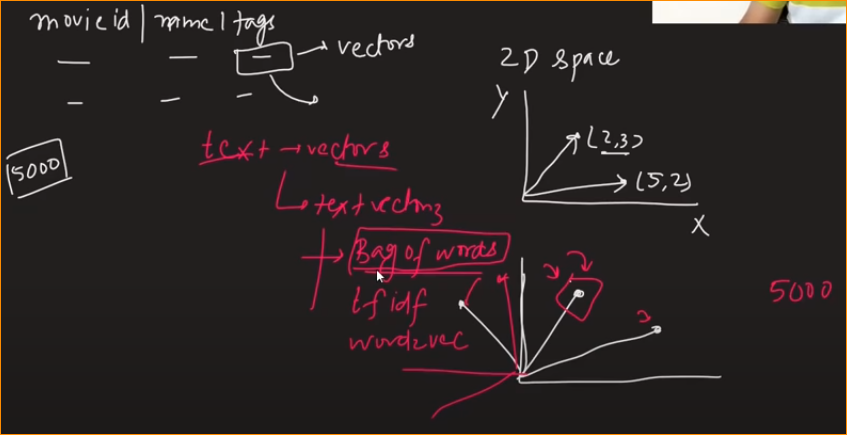

In [40]:
movies['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [41]:
movies['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

+ In BOW, we combine all words of all tags & create a big string
+ extract most common words from that big string
+ then find the count of those most common words in tags one by one & create a table
+ each row of this table is a vector of movie which we can plot
+ now when use want to find similar movie then the 1 he selected, we can reccomend the closest vector
+ which is another movie
+ while doing vectorization we'll rmove stop words

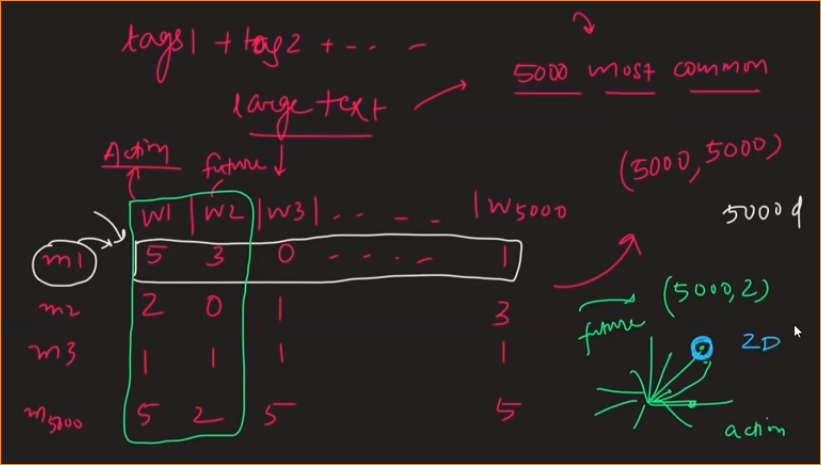

In [42]:
#we use this library to do that
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# max_features --> max words
cv = CountVectorizer(max_features=5000, stop_words='english')

In [44]:
cv.fit_transform(movies['tags']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
vectors = cv.fit_transform(movies['tags']).toarray()

In [46]:
vectors.shape

(4806, 5000)

In [47]:
#now each movie is in a vector form
#it will contain a lot of 0s bcoz every movie cant contain all 5000 words
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
#see those 5000 most common words
for i in cv.get_feature_names_out():
    print(i)

000
007
10
100
11
12
13
14
15
16
17
18
18th
19
1930s
1940s
1944
1950
1950s
1960s
1970s
1971
1974
1976
1980
1980s
1985
1990s
1999
19th
19thcentury
20
200
2003
2009
20th
24
25
30
300
3d
40
50
500
60
60s
70
aaron
aaroneckhart
abandoned
abducted
abigailbreslin
abilities
ability
able
aboard
abuse
abusive
academic
academy
accept
accepted
accepts
access
accident
accidental
accidentally
accompanied
accomplish
account
accountant
accused
ace
achieve
act
acting
action
actionhero
actions
activist
activities
activity
actor
actors
actress
acts
actual
actually
adam
adams
adamsandler
adamshankman
adaptation
adapted
addict
addicted
addiction
adolescence
adopt
adopted
adoption
adopts
adrienbrody
adult
adultery
adulthood
adults
advantage
adventure
adventures
advertising
advice
affair
affairs
affection
affections
afghanistan
africa
african
africanamerican
aftercreditsstinger
afterlife
aftermath
age
aged
agedifference
agency
agenda
agent
agents
aggressive
aging
ago
agree
agrees
ahead
aid
aided
aids
ailing


+ there are still issues as it contains duplicate words
+ like animal & animals, love & loved
# so we can apply stemming & remove duplicate words

In [49]:
import nltk

In [50]:
from nltk.stem.porter import PorterStemmer

In [51]:
ps = PorterStemmer()

In [52]:
print(ps.stem('loving'))
print(ps.stem('loved'))

love
love


In [53]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return (" ").join(y)

In [54]:
stem("captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski")

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [55]:
movies['tags'] = movies['tags'].apply(stem)

In [56]:
movies

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


# now repeat above steps again & convert movies into vectors with updated dataset

In [57]:
# max_features --> max words
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(movies['tags']).toarray()

In [58]:
for i in cv.get_feature_names_out():
    print(i)

000
007
10
100
11
12
13
14
15
16
17
17th
18
18th
18thcenturi
19
1910
1920
1930
1940
1944
1950
1950s
1960
1960s
1970
1970s
1971
1974
1976
1980
1985
1990
1999
19th
19thcenturi
20
200
2003
2009
20th
21st
23
24
25
30
300
3d
40
50
500
60
70
80
aaron
aaroneckhart
abandon
abduct
abigailbreslin
abil
abl
aboard
abov
abus
academ
academi
accept
access
accid
accident
acclaim
accompani
accomplish
account
accus
ace
achiev
acquaint
act
action
actionhero
activ
activist
activities
actor
actress
actual
ad
adam
adamsandl
adamshankman
adapt
add
addict
adjust
admir
admit
adolesc
adopt
ador
adrienbrodi
adult
adultanim
adulteri
adulthood
advanc
adventur
adventure
adventures
advertis
advic
advis
affair
affect
afghanistan
africa
african
africanamerican
aftercreditssting
afterlif
aftermath
ag
age
agediffer
agenc
agency
agenda
agent
agents
aggress
ago
agre
ahead
aid
aidanquinn
ail
aim
air
airplan
airplanecrash
airport
aka
al
alabama
alan
alaska
albert
alcatraz
alcohol
alecbaldwin
alex
alexkendrick
alfredhitchcoc

In [59]:
#we'll find the cosine distance
#lesser the distance higher the similarity
#reason why we're not using eucladean distance is bcoz
#for higher dimensional data, it fails

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
similarity = cosine_similarity(vectors)

In [62]:
similarity.shape

(4806, 4806)

In [63]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [64]:
# this is metrix of distance between 1st movie with every movie
#first movie similairty with itself should be 1 thats why it says 1
#so diagnol will always be 1

In [65]:
movies[movies['title'] == 'Batman Begins' ].index[0]

119

In [66]:
similarity[movies[movies['title'] == 'Batman Begins' ].index[0]]

array([0.0433555 , 0.04583492, 0.09449112, ..., 0.03706247, 0.09545044,
       0.06113544])

In [67]:
#in order to keep the index to check we can use enumerate
list(enumerate(similarity[movies[movies['title'] == 'Batman Begins' ].index[0]]))

[(0, 0.043355498476206004),
 (1, 0.04583492485141056),
 (2, 0.0944911182523068),
 (3, 0.3177444546511212),
 (4, 0.09746014694818131),
 (5, 0.10714285714285715),
 (6, 0.016574838603294898),
 (7, 0.14101901870444156),
 (8, 0.04879500364742666),
 (9, 0.2988071523335985),
 (10, 0.19015970731391627),
 (11, 0.17542826450672636),
 (12, 0.09925833339709303),
 (13, 0.018531232916527533),
 (14, 0.14790199457749043),
 (15, 0.03450327796711771),
 (16, 0.065033247714309),
 (17, 0.09869275424396534),
 (18, 0.1251222494179709),
 (19, 0.03421929554145775),
 (20, 0.23904572186687872),
 (21, 0.13552618543578768),
 (22, 0.0),
 (23, 0.0),
 (24, 0.1098436937909367),
 (25, 0.056033181468052584),
 (26, 0.06338656910463875),
 (27, 0.08554823885364438),
 (28, 0.024000768036865967),
 (29, 0.03571428571428572),
 (30, 0.12848904218751167),
 (31, 0.07862136275414389),
 (32, 0.0),
 (33, 0.053452248382484885),
 (34, 0.0),
 (35, 0.13638618139749525),
 (36, 0.06043672230190352),
 (37, 0.0),
 (38, 0.15033444857573872),

In [68]:
#now sort them
sorted(list(enumerate(similarity[movies[movies['title'] == 'Batman Begins' ].index[0]])), reverse=True, key=lambda x:x[1])

[(119, 1.0000000000000002),
 (65, 0.40218090755486674),
 (1363, 0.35434169344615046),
 (1362, 0.3340765523905305),
 (3, 0.3177444546511212),
 (3297, 0.3120099844792576),
 (4148, 0.3021836115095176),
 (9, 0.2988071523335985),
 (2252, 0.2895330120717931),
 (3825, 0.28867513459481287),
 (3732, 0.2770256256719071),
 (1250, 0.27533366183038216),
 (3261, 0.2750095491084634),
 (4105, 0.2693740118805895),
 (210, 0.26805548212375485),
 (1456, 0.2672612419124244),
 (4641, 0.2672612419124244),
 (2960, 0.26551033051027584),
 (1415, 0.2640084484055256),
 (428, 0.2605842192811105),
 (4141, 0.2598505751938437),
 (79, 0.25877458475338283),
 (3238, 0.25209208668275807),
 (813, 0.24817115320439406),
 (1256, 0.2451825928095098),
 (299, 0.24488368066812727),
 (697, 0.24365796154926905),
 (3310, 0.24325638628366392),
 (1887, 0.24307639633206166),
 (3647, 0.2417468892076141),
 (3341, 0.24090602791485793),
 (3336, 0.24053511772118197),
 (20, 0.23904572186687872),
 (2394, 0.23904572186687872),
 (711, 0.238455

In [69]:
#extract top 5 reccomendations
sorted(list(enumerate(similarity[movies[movies['title'] == 'Batman Begins' ].index[0]])), reverse=True, key=lambda x:x[1])[1:6]

[(65, 0.40218090755486674),
 (1363, 0.35434169344615046),
 (1362, 0.3340765523905305),
 (3, 0.3177444546511212),
 (3297, 0.3120099844792576)]

In [70]:
movies.iloc[1216].title

'Aliens vs Predator: Requiem'

In [71]:
def reccomend(movie):
    #find index of movie
    #extract similarity metrix of that movie
    #sort them & return names of 1st five movies
    
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]
    
    recommended_movies = [movies.loc[i[0]].title for i in movie_list]
    return recommended_movies

In [72]:
reccomend('War')

['Mercury Rising',
 'Young Adult',
 'The Sentinel',
 'The X Files: I Want to Believe',
 'Tusk']

# We just have to convert this into a website

+ we can pickle the movies df, similarity, using the pickle module in Python
+ unpickle it to use it to create website

In [77]:
import pickle

In [84]:
pickle.dump(movies, open('movies.pkl','wb'))

In [85]:
pickle.dump(similarity, open('similarity.pkl','wb'))

In [86]:
pickle.dump(cv, open('cv.pkl','wb'))